In [1]:
# import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# supress Warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# read data to pandas dataframe
df = pd.read_csv("Leads.csv")

In [3]:
# chech the shape
df.shape

(9240, 37)

## Inspecting the Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
# Display all columns
pd.set_option("display.max_columns",None)
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Data Cleaning

In [6]:
df["Do Not Email"].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [7]:
df["Do Not Call"].value_counts()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [8]:
df["Search"].value_counts()

No     9226
Yes      14
Name: Search, dtype: int64

### Handling Imbalances

As it can be noticed that for most of columns having a "yes/no" responce the data is highly Imbalanced, dropping the columns if the responce is no for more than 90% rows

In [9]:

for col in set(df.columns)-set(df.describe().columns):
    if df[col].unique().shape[0]<=2 and df[df[col]=="No"].count().max()>.9*df.shape[0]:
        df.drop(col,axis=1,inplace=True)
    

In [10]:
df.shape

(9240, 24)

In [11]:
# out of 13 "yes/no" responce columns 12 were having "no" as responce for more than 90% of rows
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'Lead Quality',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [12]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,Interested in other courses,Low in Relevance,Select,Select,02.Medium,02.Medium,15.0,15.0,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,Ringing,NaN,Select,Select,02.Medium,02.Medium,15.0,15.0,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,Ringing,Not Sure,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,Will revert after reading the email,Might be,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,Modified


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

## Null Handling

In [14]:
# Drop Columns having null values grater than 45%
for i in set(df.columns):
    if df[i].isnull().sum() >.45*df.shape[0]:
        df.drop(i, axis=1, inplace=True)

In [15]:
df.shape

(9240, 19)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 19 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [17]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Tags,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,Interested in other courses,Select,Select,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,Ringing,Select,Select,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,Will revert after reading the email,Potential Lead,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,Ringing,Select,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,Will revert after reading the email,Select,Mumbai,No,Modified


In [18]:
df["How did you hear about X Education"].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [19]:
# as lot of columns are having "select" as a value check if sum of null and "select" is grater than 50% and drop the same
for i in (set(df.columns)-set(df.describe().columns)):
    if df[i].isnull().sum() + df[df[i]=="Select"].shape[0]>.5*df.shape[0]:
        df.drop(i, axis=1, inplace=True)

In [20]:
df.shape

(9240, 17)

In [21]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 17 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [23]:
df["Lead Source"].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [24]:
# From the above it can be noticed that Google appears twice with different cases. Hence we shall convert all rows with value 
# "Google" to the same case.
df['Lead Source'] = df['Lead Source'].replace('google', 'Google')

In [25]:
df.TotalVisits.value_counts().head(10)

0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
6.0     466
1.0     395
7.0     309
8.0     224
9.0     164
Name: TotalVisits, dtype: int64

In [26]:
# Replace null in "total visit" by "0.0" as it appears logical and is also the mode. 
df.loc[df.TotalVisits.isnull(),"TotalVisits"]=0.0

In [27]:
df["Page Views Per Visit"].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [28]:
# Replace null in "Page Views Per Visit" by "0.0" as it appears logical and is also the mode. 
df.loc[df["Page Views Per Visit"].isnull(),"Page Views Per Visit"]=0.00

In [29]:
df["Last Activity"].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [30]:
df["Last Notable Activity"].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [31]:
# columns "last activity" and "last notable Activity" are having similar categories  
# "last Activity" is having many nan also so it can be dropped
df.drop("Last Activity",axis=1,inplace=True)

### As a lot of categorical columns are having lot of categories, and for many of them "value_counts" is less than 100 which is around 1%, and for many of them "value_counts"=1, this will create an imbalance

In [32]:
# if the "value_counts" for a category in a categorical column is less than 100 add all such categories under the name "other" 
for col in ["Lead Origin","Lead Source","Last Notable Activity","Specialization","What is your current occupation"]:
    
    for i in df[col].values:
        if df[df[col]==i][col].count()<100:
            df.loc[df[col]==i,col]="Other"

In [33]:
df["Lead Source"].value_counts()

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Other                 78
Name: Lead Source, dtype: int64

In [34]:
df.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [35]:
# It apears logical to replace nan in country by India as it is the mode.
df.loc[df.Country.isnull(),"Country"]= "India"

In [36]:
# Replace the country by other if its not india to reduce imbalance as all are having "Value_count" less 70, 1%.
df.loc[df.Country!="India","Country"]= "Other"

In [37]:
df.Country.value_counts()

India    8953
Other     287
Name: Country, dtype: int64

In [38]:
df.Specialization.value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Other                                 170
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Name: Specialization, dtype: int64

In [39]:
# as many of the applicant has not filled the field "Specialization" it appears the relavent option was not available.
# "Select" is the mode for the column so replace nan by "select"
df.Specialization.fillna("Select", inplace=True)

In [40]:
# Finaly replace "Select" by "not mentioned"
df.loc[df.Specialization=="Select", "Specialization"]="Not Mentioned"

In [41]:
df["What is your current occupation"].isnull().sum()

2690

In [42]:
df["What is your current occupation"].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     34
Name: What is your current occupation, dtype: int64

In [43]:
df[df["What is your current occupation"].isnull()].Converted.value_counts()

0    2320
1     370
Name: Converted, dtype: int64

In [44]:
df[df["What is your current occupation"]=="Unemployed"].Converted.value_counts()

0    3159
1    2441
Name: Converted, dtype: int64

In [45]:
# the distribution of target variable i.e. "Converted" among "nan" is very diffrent from "Unemployed" category.
# theirfore replace "nan" by "not mentioned" in the column "What is your current occupation" 
df["What is your current occupation"].fillna("Not Mentioned",inplace=True)

In [46]:
df["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [47]:
df.Tags.value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [48]:
df.Tags.isnull().sum()/df.shape[0]

0.36287878787878786

In [49]:
# Drop "What matters most to you in choosing a course"  highly imbalanced 
# Drop  "Tags" "nan" is grater than the mode
df.drop(["What matters most to you in choosing a course","Tags"],axis=1, inplace=True)

In [50]:
df.City.fillna("Not Mentioned",inplace=True)

In [51]:
df.City.value_counts()

Mumbai                         3222
Select                         2249
Not Mentioned                  1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [52]:
df.loc[df.City=="Select","City"]="Not Mentioned"

In [53]:
df.City.value_counts()

Not Mentioned                  3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

df.info()

In [54]:
df.Converted.value_counts()

0    5679
1    3561
Name: Converted, dtype: int64

## Handling Outliers

In [55]:
df["Lead Source"].value_counts()

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Other                 78
Name: Lead Source, dtype: int64

In [56]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.394156,487.698268,2.327787
std,23405.995698,0.486714,4.836682,548.021466,2.164258
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,0.000000,12.000000,0.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


### There are a lot of outliers on the higher side of numerical variabels

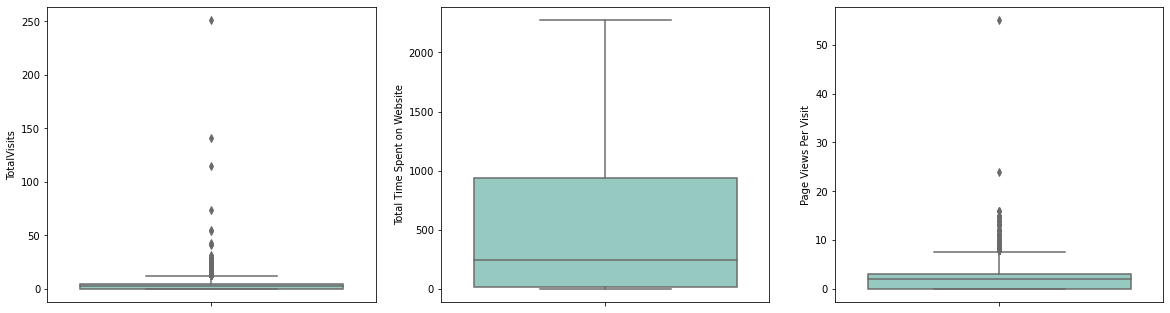

In [57]:
# Check the outliers in all the numeric columns

plt.figure(figsize=(20, 25))
plt.subplot(4,3,1)
sns.boxplot(y = 'TotalVisits', palette='Set3', data = df)
plt.subplot(4,3,2)
sns.boxplot(y = 'Total Time Spent on Website', palette='Set3', data = df)
plt.subplot(4,3,3)
sns.boxplot(y = 'Page Views Per Visit', palette='Set3', data = df)
plt.show()

In [58]:
# Replace outliers by (1.5 *IQR) +(value corresponding to 75 percentile)
for i in ["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]:
    
    IQR =df[i].quantile(.75)-df[i].quantile(.25)
    df.loc[df[i]>df[i].quantile(.75)+1.5*IQR,i]=df[i].quantile(.75)+1.5*IQR


<AxesSubplot:xlabel='Page Views Per Visit'>

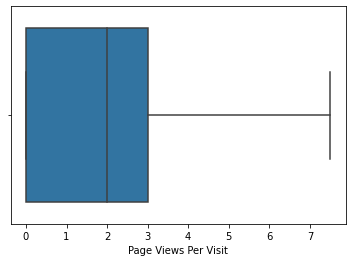

In [59]:
sns.boxplot(x="Page Views Per Visit",data=df)

## Data Analysis


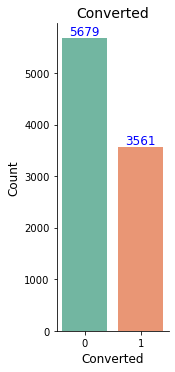

In [60]:
# Conversion Rate 

plot = sns.catplot(x="Converted", kind="count", data=df, palette="Set2", aspect= 0.5);

plt.title('Converted', fontsize = 14)
plt.xlabel("Converted", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

   
plt.show()

From the above graph, there has been a overall conversion rate of around 38.5%

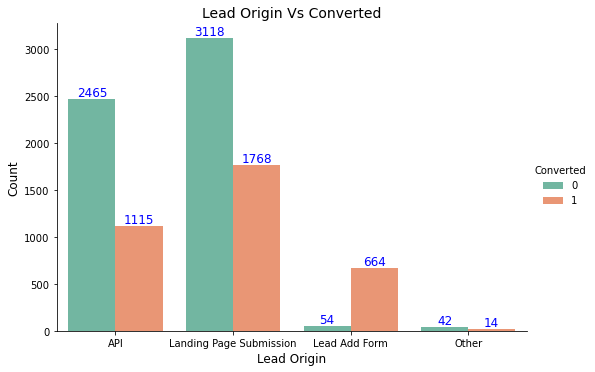

In [61]:
# Lead Origin

plot = sns.catplot(x="Lead Origin", hue = "Converted", kind="count", data=df, palette="Set2", aspect= 1.5);

plt.title('Lead Origin Vs Converted', fontsize = 14)
plt.xlabel("Lead Origin", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')
    


plt.show()
    



From the above graph, it can be seen that the maximum conversion happened from Landing Page Submission Also the rate of conversion for "Lead Add Form" is 92.5% which is very high compared to 38.5 overall conversion rate

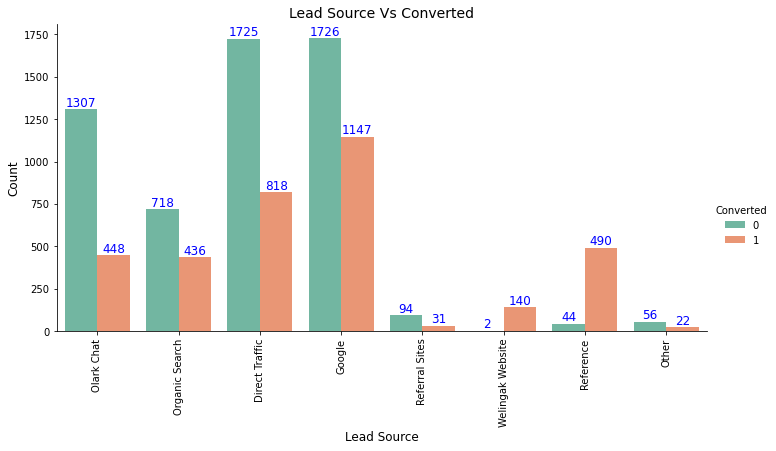

In [62]:
# Lead Source

plot = sns.catplot(x="Lead Source", hue = "Converted", kind="count", data=df, palette="Set2", aspect = 2.0);

plt.title('Lead Source Vs Converted', fontsize = 14)
plt.xlabel("Lead Source", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()
   

Rate of conversion from "Refrence" is around 92% and "Welingark Website" is 98.5% but the total no of customers comung from "Welingark website" and "Refrence" is less than 1%

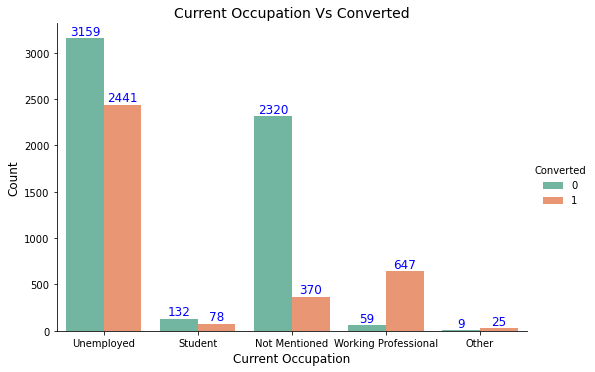

In [63]:
# What is your current occupation

plot = sns.catplot(x="What is your current occupation", hue = "Converted", kind="count", data=df, palette="Set2", 
                   aspect = 1.5);

plt.title('Current Occupation Vs Converted', fontsize = 14)
plt.xlabel("Current Occupation", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

Conversion rate for "unemployed" is slightly higher at 43% compared to overall conversion rate of 38.5%. It can also be noticed from the above data that Conversion rate for Working Professional" is around 90%.

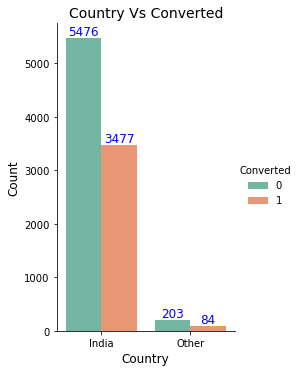

In [64]:
# Country

plot = sns.catplot(x="Country", hue = "Converted", kind="count", data=df, palette="Set2",aspect = 0.7);

plt.title('Country Vs Converted', fontsize = 14)
plt.xlabel("Country", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

Conversion rate for "India" is higher as compared to "Others"

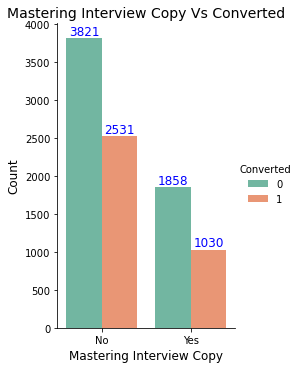

In [65]:
# A free copy of Mastering The Interview

plot = sns.catplot(x="A free copy of Mastering The Interview", hue = "Converted", kind="count", data=df, palette="Set2",
                   aspect = 0.7);

plt.title('Mastering Interview Copy Vs Converted', fontsize = 14)
plt.xlabel("Mastering Interview Copy", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

Conversion rate is high on leads who do not want a free copy of Mastering Interviews

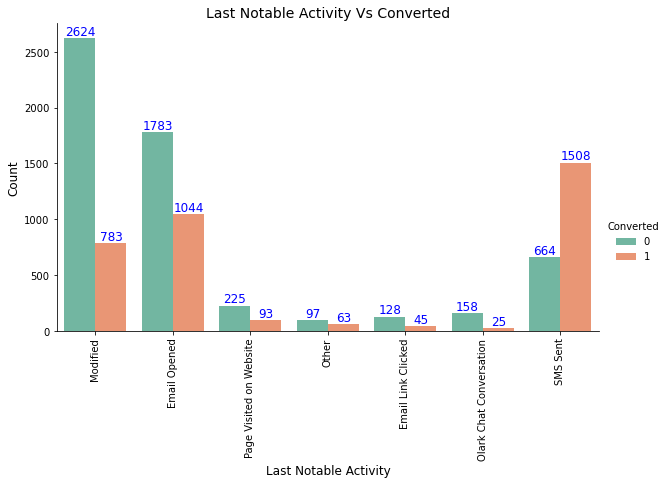

In [66]:
# Last Notable Activity

plot = sns.catplot(x="Last Notable Activity", hue = "Converted", kind="count", data=df, palette="Set2", aspect = 1.7);

plt.title('Last Notable Activity Vs Converted', fontsize = 14)
plt.xlabel("Last Notable Activity", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

It can be noticed that the conversion rate is around 70% for "SMS Sent" 

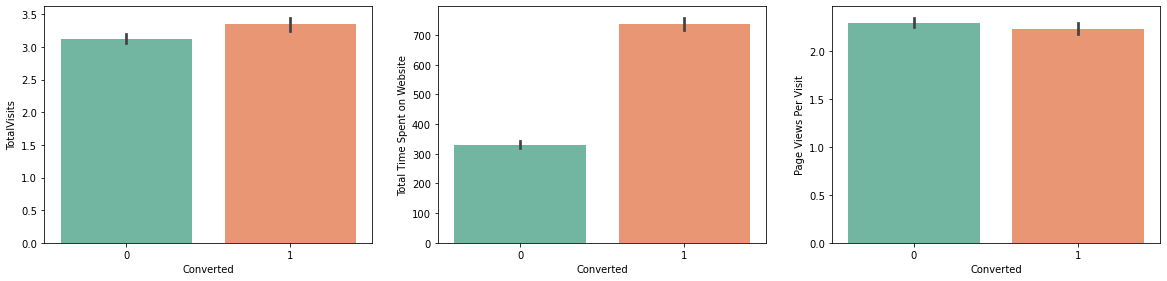

In [67]:
# Now check the conversions for all numeric values

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', palette='Set2', data = df)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', palette='Set2', data = df)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', palette='Set2', data = df)

plt.show()

Among the numerical variabels "Total Time Spent on Website" is having high Predective Power as average time spent by converted cases is more than twice the time spent by non converted cases.

## Data Preprocessing

In [68]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [69]:
# Scaling categorical variabels
scaler =MinMaxScaler()
df[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]] = scaler.fit_transform(df[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]])

In [70]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,0.257108,0.214656,0.303332
std,23405.995698,0.486714,0.240411,0.241207,0.255704
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,0.000000,0.005282,0.000000
50%,615479.000000,0.000000,0.240000,0.109155,0.266667
75%,637387.250000,1.000000,0.400000,0.411972,0.400000
max,660737.000000,1.000000,1.000000,1.000000,1.000000


### Split data  into X (features) and y(Output variable)

In [71]:
X=df.drop("Converted",axis=1)
X.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0.00,0.000000,0.000000,India,Not Mentioned,Unemployed,Not Mentioned,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0.40,0.296655,0.333333,India,Not Mentioned,Unemployed,Not Mentioned,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0.16,0.674296,0.266667,India,Business Administration,Student,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0.08,0.134243,0.133333,India,Media and Advertising,Unemployed,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0.16,0.628521,0.133333,India,Not Mentioned,Unemployed,Mumbai,No,Modified


In [72]:
y=df.Converted
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [73]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Number                             9240 non-null   int64  
 2   Lead Origin                             9240 non-null   object 
 3   Lead Source                             9204 non-null   object 
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   float64
 6   Page Views Per Visit                    9240 non-null   float64
 7   Country                                 9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  City                                    9240 non-null   obje

In [74]:
# map binary variabels to {0,1}
variable_list=["Country","A free copy of Mastering The Interview"]
X["A free copy of Mastering The Interview"]=X["A free copy of Mastering The Interview"].map({'Yes': 1, "No": 0})
X.Country=X.Country.map({"India":1,"Other":0})

In [75]:
# map categorical variabels having multiple categories to dummies
Col=['Lead Origin', 'Lead Source', 'Specialization', 'What is your current occupation', 'City','Last Notable Activity']
dummy=pd.get_dummies(X[Col],drop_first=True)

In [76]:
dummy.shape

(9240, 42)

In [77]:
# Concatenating the dummy variabels with X(features)
X = pd.concat([X,dummy], axis=1)
X.shape

(9240, 55)

In [78]:
# Drop the categorical columns converted to dummies
X.drop(Col,axis=1,inplace=True)

In [79]:
X.shape

(9240, 49)

###  Checking for highly correlated features

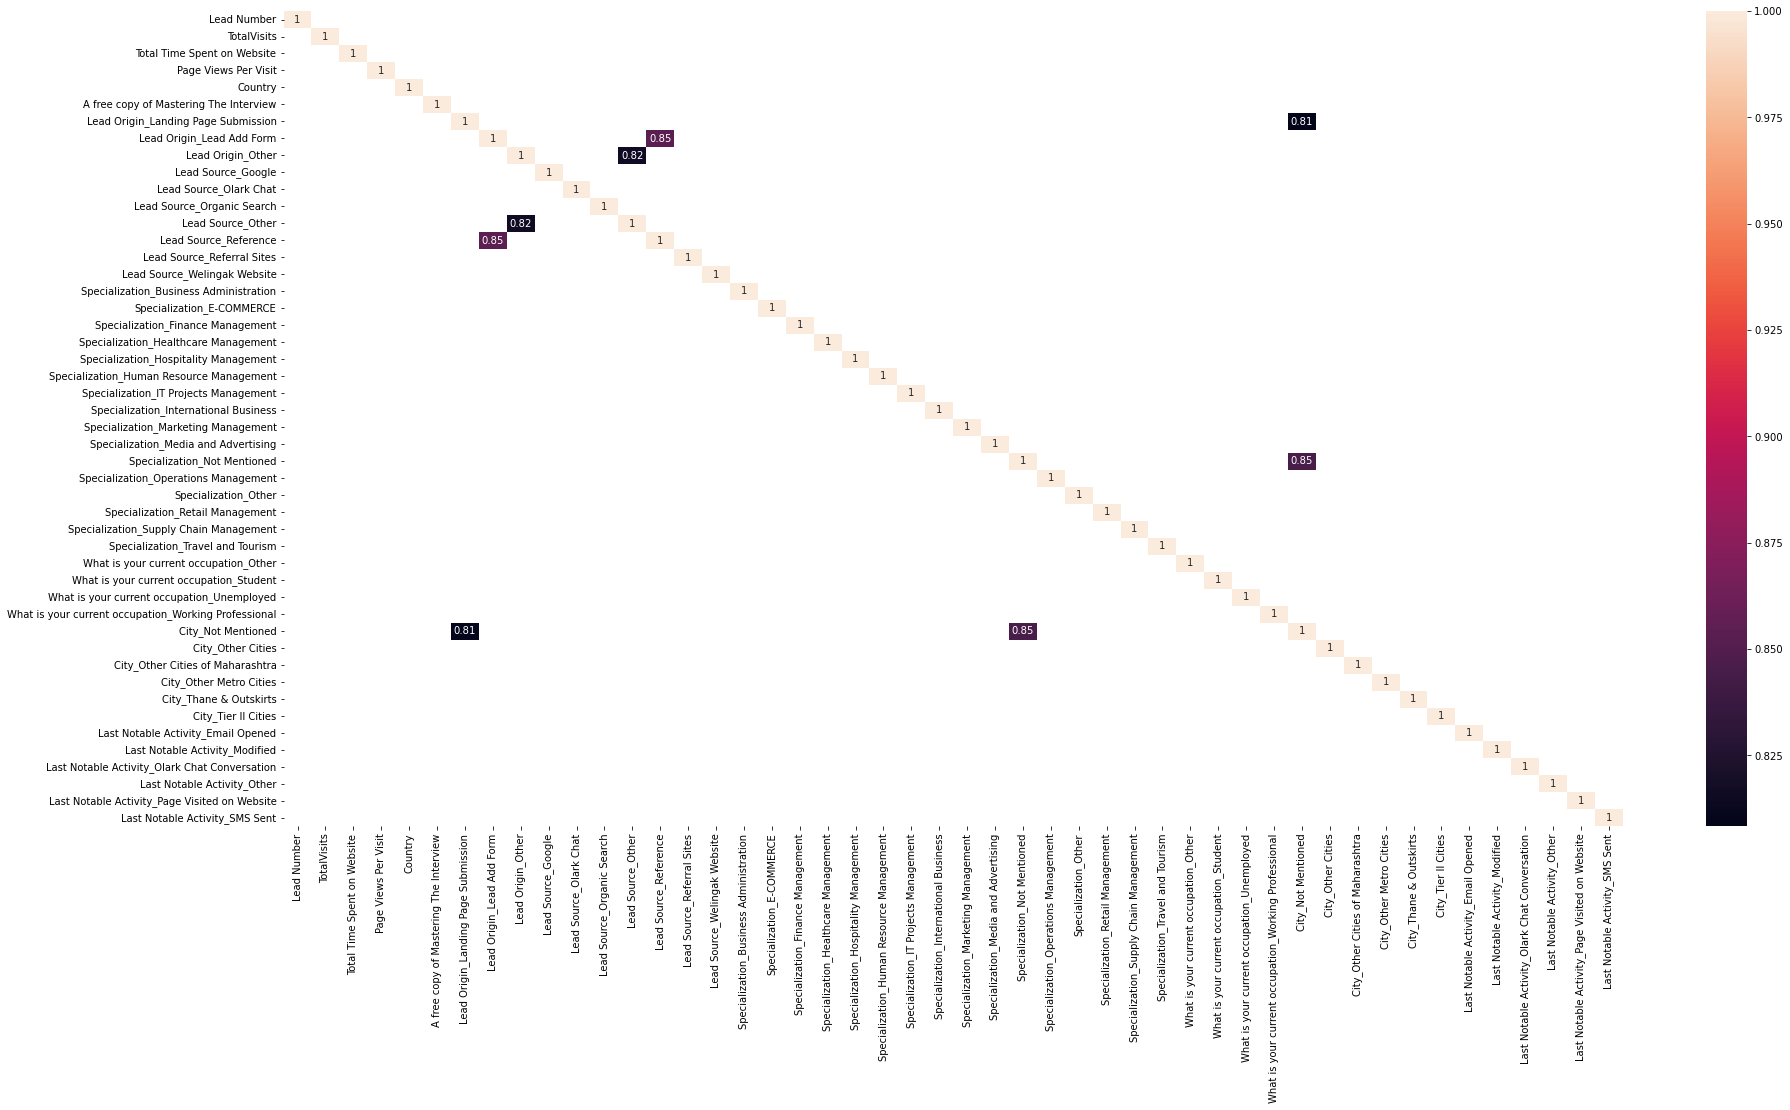

In [80]:
cor=X.corr().abs()
filterdf=cor[cor>=.75]
plt.figure(figsize = (30,15))        # Size of the figure
sns.heatmap(filterdf,annot = True)
plt.show()

In [81]:
# drop highly correlated features
X.drop(["Specialization_Not Mentioned","Lead Origin_Landing Page Submission","Lead Source_Other","Lead Source_Reference"],axis=1,inplace=True)

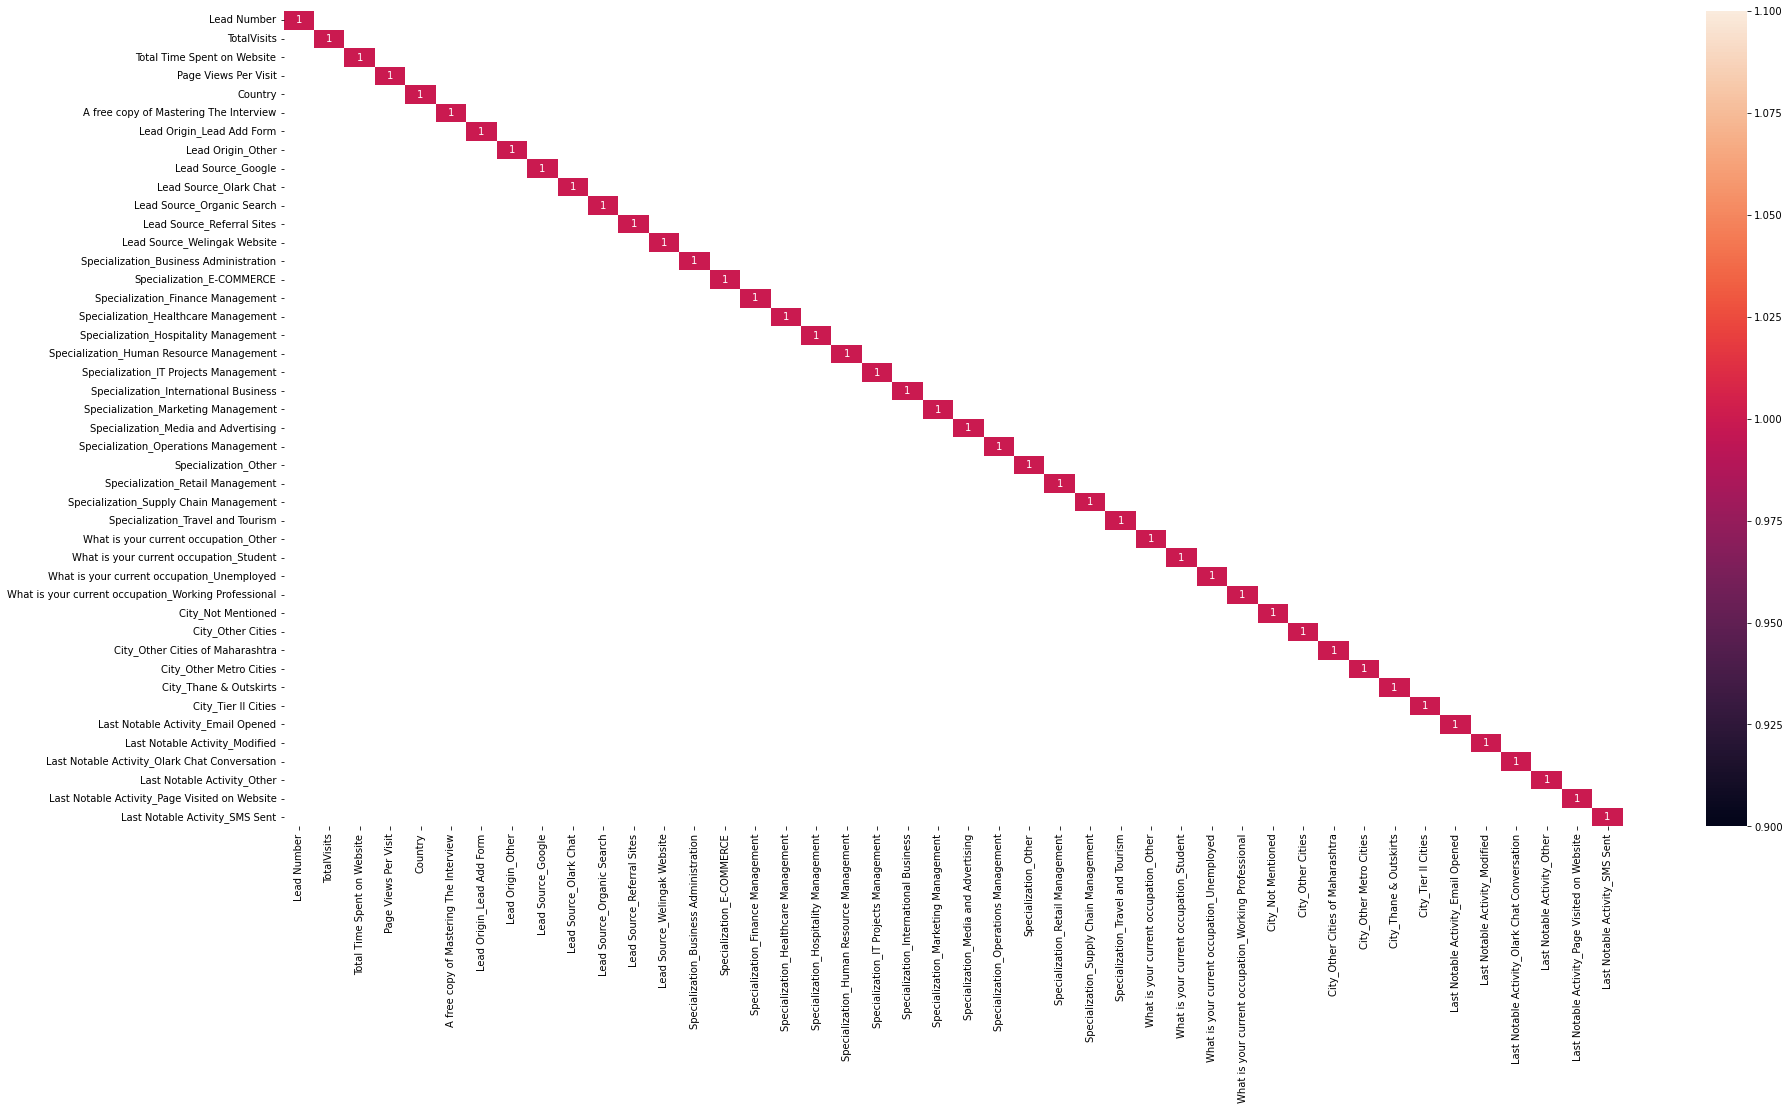

In [82]:
cor=X.corr().abs()
filterdf=cor[cor>=.75]
plt.figure(figsize = (30,15))        # Size of the figure
sns.heatmap(filterdf,annot = True)
plt.show()

In [83]:
X.shape

(9240, 45)

### Test Train split

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [85]:
# Drop Refrence ID of the lead.
X_train_1=X_train.drop(["Prospect ID","Lead Number"],axis=1)
X_test_1=X_test.drop(["Prospect ID","Lead Number"],axis=1)
X_train.shape

(6468, 45)

## Logistic Regression Model Building

In [86]:
import statsmodels.api as sm

In [87]:
# building first model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train_1)), family = sm.families.Binomial())
smdl=logm1.fit()
smdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6424
Model Family:                Binomial   Df Model:                           43
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2632.9
Date:                Fri, 03 Mar 2023   Deviance:                       5265.7
Time:                        16:58:09   Pearson chi2:                 6.68e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4026
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.7795      0.386     -9.798      0.000      -4.536      -3.024
TotalVisits                                              1.4827      0.221      6.717      0.000       1.050       1.915
Total Time Spent on Website                              4.5477      0.168     27.143      0.000       4.219       4.876
Page Views Per Visit                                    -1.1692      0.231     -5.053      0.000      -1.623      -0.716
Country                                                  0.1403      0.206      0.682      0.495      -0.263       0.544
A free copy of Mastering The Interview                  -0.2839      0.108     -2.622      0.009      -0.496      -0.072
Lead Origin_Lead Add Form                                3.8361      0.221     17.368      0.000       3.403       4.269
Lead Origin_Other                                        0.4277      0.527      0.812      0.417      -0.605       1.460
Lead Source_Google                                       0.4054      0.112      3.623      0.000       0.186       0.625
Lead Source_Olark Chat                                   1.5988      0.153     10.463      0.000       1.299       1.898
Lead Source_Organic Search                               0.2541      0.129      1.964      0.050       0.001       0.508
Lead Source_Referral Sites                               0.3273      0.321      1.021      0.307      -0.301       0.956
Lead Source_Welingak Website                             2.1386      0.744      2.873      0.004       0.680       3.597
Specialization_Business Administration                   0.0753      0.201      0.375      0.707      -0.318       0.468
Specialization_E-COMMERCE                                0.4959      0.321      1.543      0.123      -0.134       1.126
Specialization_Finance Management                        0.3488      0.160      2.183      0.029       0.036       0.662
Specialization_Healthcare Management                     0.3609      0.298      1.213      0.225      -0.222       0.944
Specialization_Hospitality Management                   -0.7896      0.344     -2.294      0.022      -1.464      -0.115
Specialization_Human Resource Management                 0.1762      0.159      1.108      0.268      -0.136       0.488
Specialization_IT Projects Management                    0.3287      0.214      1.535      0.125      -0.091       0.749
Specialization_International Business                   -0.1704      0.278     -0.612      0.540      -0.716       0.375
Specialization_Marketing Management                      0.2382      0.157      1.522      0.128      -0.069       0.545
Specialization_Media and Advertising                     0

### Many of the variabels are having high significance level so reducing the no of features using RFE to 18

In [88]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [89]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg,n_features_to_select=18)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train_1, y_train)

In [90]:
rfe.support_

array([ True,  True,  True, False,  True,  True, False, False,  True,
       False, False,  True, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
        True,  True,  True,  True,  True, False, False, False, False,
       False,  True, False,  True,  True, False,  True])

In [91]:
# RFE Rankings
list(zip(X_train_1.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Country', False, 21),
 ('A free copy of Mastering The Interview', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Other', False, 11),
 ('Lead Source_Google', False, 6),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 10),
 ('Lead Source_Referral Sites', False, 9),
 ('Lead Source_Welingak Website', True, 1),
 ('Specialization_Business Administration', False, 23),
 ('Specialization_E-COMMERCE', False, 8),
 ('Specialization_Finance Management', False, 13),
 ('Specialization_Healthcare Management', False, 12),
 ('Specialization_Hospitality Management', True, 1),
 ('Specialization_Human Resource Management', False, 20),
 ('Specialization_IT Projects Management', False, 14),
 ('Specialization_International Business', False, 3),
 ('Specialization_Marketing Management', False, 16),
 ('Specialization_Media and Advertising', False, 15),
 ('Sp

In [92]:
# Extracting the features selected by RFE to a list 
col = X_train_1.columns[rfe.support_]

In [93]:
# checking the columns dropped by rfe
X_train_1.columns[~rfe.support_]

Index(['Country', 'Lead Origin_Other', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Specialization_Business Administration', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management', 'Specialization_Other',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts', 'City_Tier II Cities',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [94]:
# Modified training set with fratures selected by RFE
X_train_1=X_train[col]

### Manual Feature Elimination

In [95]:
X_train_sm = sm.add_constant(X_train_1[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2646.6
Date:                Fri, 03 Mar 2023   Deviance:                       5293.1
Time:                        16:58:16   Pearson chi2:                 6.72e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4001
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4679      0.145    -23.975      0.000      -3.751      -3.184
TotalVisits                                              1.5489      0.207      7.496      0.000       1.144       1.954
Total Time Spent on Website                              4.5554      0.166     27.413      0.000       4.230       4.881
Page Views Per Visit                                    -1.1045      0.223     -4.964      0.000      -1.541      -0.668
A free copy of Mastering The Interview                  -0.4766      0.087     -5.465      0.000      -0.648      -0.306
Lead Origin_Lead Add Form                                3.6004      0.205     17.531      0.000       3.198       4.003
Lead Source_Olark Chat                                   1.3247      0.131     10.127      0.000       1.068       1.581
Lead Source_Welingak Website                             2.0863      0.744      2.805      0.005       0.629       3.544
Specialization_Hospitality Management                   -1.0042      0.326     -3.078      0.002      -1.644      -0.365
Specialization_Retail Management                        -0.5382      0.328     -1.641      0.101      -1.181       0.104
What is your current occupation_Other                    1.7907      0.512      3.494      0.000       0.786       2.795
What is your current occupation_Student                  0.9805      0.238      4.119      0.000       0.514       1.447
What is your current occupation_Unemployed               1.0021      0.088     11.422      0.000       0.830       1.174
What is your current occupation_Working Professional     3.5692      0.198     17.998      0.000       3.180       3.958
City_Not Mentioned                                      -0.4407      0.096     -4.571      0.000      -0.630      -0.252
Last Notable Activity_Email Opened                       0.7202      0.084      8.567      0.000       0.555       0.885
Last Notable Activity_Olark Chat Conversation           -0.4685      0.342     -1.370      0.171      -1.139       0.202
Last Notable Activity_Other                              0.9075      0.253      3.585      0.000       0.411       1.404
Last Notable Activity_SMS Sent                           1.9591      0.091     21.537      0.000       1.781       2.137
========================================================================================================================
"""

In [96]:
# Checking Predictions by model
y_train_pred = res.predict(X_train_sm)

In [97]:
# Reshaping the predictions from a series
y_train_pred = y_train_pred.values.reshape(-1)

In [98]:
# Creating a Datarane of Predicted Probabilities and Target variable 
y_train_pred_final = pd.DataFrame({'Prospect ID':X_train["Prospect ID"],'Converted':y_train.values, 'Conv_Prob':y_train_pred})
y_train_pred_final.set_index('Prospect ID',inplace=True)
y_train_pred_final.head()

,Converted,Conv_Prob
Prospect ID,,
f3af2d98-02db-45d7-bbf6-c641d6b4f4c3,0,0.296997
207aaf73-a121-41b8-96bb-b0d5c38e7a7b,0,0.279705
db308a34-ade6-4f0d-9779-586c5be188c7,0,0.401868
1199b37d-f610-4bb8-bf18-15267dec61fa,0,0.863273
6b2d3b2f-9990-449c-9333-012b578e39c8,0,0.170535


In [99]:
# Setting cutoff at .5
y_train_pred_final['predicted'] = y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conv_Prob,predicted
Prospect ID,,,
f3af2d98-02db-45d7-bbf6-c641d6b4f4c3,0,0.296997,0
207aaf73-a121-41b8-96bb-b0d5c38e7a7b,0,0.279705,0
db308a34-ade6-4f0d-9779-586c5be188c7,0,0.401868,0
1199b37d-f610-4bb8-bf18-15267dec61fa,0,0.863273,1
6b2d3b2f-9990-449c-9333-012b578e39c8,0,0.170535,0


### Model Evaluation

In [100]:
from sklearn import metrics

In [101]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3550  452]
 [ 747 1719]]


In [102]:
# Accuracy of model
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.814625850340136


In [103]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [104]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_1[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_1[col].values, i) for i in range(X_train_1[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,5.72
0,TotalVisits,4.84
11,What is your current occupation_Unemployed,2.90
13,City_Not Mentioned,2.40
1,Total Time Spent on Website,2.11
5,Lead Source_Olark Chat,2.03
3,A free copy of Mastering The Interview,1.83
17,Last Notable Activity_SMS Sent,1.70
4,Lead Origin_Lead Add Form,1.70
14,Last Notable Activity_Email Opened,1.69


In [105]:
# Chechk the model
X_train_sm = sm.add_constant(X_train_1[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2646.6
Date:                Fri, 03 Mar 2023   Deviance:                       5293.1
Time:                        16:58:18   Pearson chi2:                 6.72e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4001
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4679      0.145    -23.975      0.000      -3.751      -3.184
TotalVisits                                              1.5489      0.207      7.496      0.000       1.144       1.954
Total Time Spent on Website                              4.5554      0.166     27.413      0.000       4.230       4.881
Page Views Per Visit                                    -1.1045      0.223     -4.964      0.000      -1.541      -0.668
A free copy of Mastering The Interview                  -0.4766      0.087     -5.465      0.000      -0.648      -0.306
Lead Origin_Lead Add Form                                3.6004      0.205     17.531      0.000       3.198       4.003
Lead Source_Olark Chat                                   1.3247      0.131     10.127      0.000       1.068       1.581
Lead Source_Welingak Website                             2.0863      0.744      2.805      0.005       0.629       3.544
Specialization_Hospitality Management                   -1.0042      0.326     -3.078      0.002      -1.644      -0.365
Specialization_Retail Management                        -0.5382      0.328     -1.641      0.101      -1.181       0.104
What is your current occupation_Other                    1.7907      0.512      3.494      0.000       0.786       2.795
What is your current occupation_Student                  0.9805      0.238      4.119      0.000       0.514       1.447
What is your current occupation_Unemployed               1.0021      0.088     11.422      0.000       0.830       1.174
What is your current occupation_Working Professional     3.5692      0.198     17.998      0.000       3.180       3.958
City_Not Mentioned                                      -0.4407      0.096     -4.571      0.000      -0.630      -0.252
Last Notable Activity_Email Opened                       0.7202      0.084      8.567      0.000       0.555       0.885
Last Notable Activity_Olark Chat Conversation           -0.4685      0.342     -1.370      0.171      -1.139       0.202
Last Notable Activity_Other                              0.9075      0.253      3.585      0.000       0.411       1.404
Last Notable Activity_SMS Sent                           1.9591      0.091     21.537      0.000       1.781       2.137
========================================================================================================================
"""

In [106]:
# Significance level for 'Last Notable Activity_Olark Chat Conversation' is 17% whereas max VIF is 5.7 
# drop 'Last Notable Activity_Olark Chat Conversation'
col = col.drop('Last Notable Activity_Olark Chat Conversation')

In [107]:
# Check the model
X_train_sm = sm.add_constant(X_train_1[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2647.6
Date:                Fri, 03 Mar 2023   Deviance:                       5295.2
Time:                        16:58:19   Pearson chi2:                 6.73e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3999
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4775      0.145    -24.052      0.000      -3.761      -3.194
TotalVisits                                              1.5373      0.207      7.443      0.000       1.132       1.942
Total Time Spent on Website                              4.5513      0.166     27.388      0.000       4.226       4.877
Page Views Per Visit                                    -1.1019      0.223     -4.952      0.000      -1.538      -0.666
A free copy of Mastering The Interview                  -0.4788      0.087     -5.490      0.000      -0.650      -0.308
Lead Origin_Lead Add Form                                3.6003      0.206     17.519      0.000       3.197       4.003
Lead Source_Olark Chat                                   1.3087      0.130     10.038      0.000       1.053       1.564
Lead Source_Welingak Website                             2.0898      0.744      2.810      0.005       0.632       3.548
Specialization_Hospitality Management                   -1.0025      0.326     -3.071      0.002      -1.642      -0.363
Specialization_Retail Management                        -0.5352      0.328     -1.632      0.103      -1.178       0.108
What is your current occupation_Other                    1.8019      0.513      3.514      0.000       0.797       2.807
What is your current occupation_Student                  0.9843      0.238      4.138      0.000       0.518       1.451
What is your current occupation_Unemployed               1.0062      0.088     11.473      0.000       0.834       1.178
What is your current occupation_Working Professional     3.5746      0.198     18.020      0.000       3.186       3.963
City_Not Mentioned                                      -0.4448      0.096     -4.615      0.000      -0.634      -0.256
Last Notable Activity_Email Opened                       0.7351      0.084      8.800      0.000       0.571       0.899
Last Notable Activity_Other                              0.9216      0.253      3.643      0.000       0.426       1.417
Last Notable Activity_SMS Sent                           1.9732      0.091     21.800      0.000       1.796       2.151
========================================================================================================================
"""

In [108]:
# Creating a Datarane of Predicted Probabilities and Target variable 
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Prospect ID':X_train["Prospect ID"],'Converted':y_train.values, 'Conv_Prob':y_train_pred})
y_train_pred_final.set_index('Prospect ID',inplace=True)
y_train_pred_final.head()

,Converted,Conv_Prob
Prospect ID,,
f3af2d98-02db-45d7-bbf6-c641d6b4f4c3,0,0.294745
207aaf73-a121-41b8-96bb-b0d5c38e7a7b,0,0.280298
db308a34-ade6-4f0d-9779-586c5be188c7,0,0.398313
1199b37d-f610-4bb8-bf18-15267dec61fa,0,0.863671
6b2d3b2f-9990-449c-9333-012b578e39c8,0,0.166934


In [109]:
# Setting cutoff at .5
y_train_pred_final['predicted'] = y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [110]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3551  451]
 [ 746 1720]]


In [111]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.814935064935065


Acuracy not affected by dropping the variable

In [112]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_1[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_1[col].values, i) for i in range(X_train_1[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,5.72
0,TotalVisits,4.83
11,What is your current occupation_Unemployed,2.90
13,City_Not Mentioned,2.40
1,Total Time Spent on Website,2.11
5,Lead Source_Olark Chat,1.99
3,A free copy of Mastering The Interview,1.83
4,Lead Origin_Lead Add Form,1.70
16,Last Notable Activity_SMS Sent,1.68
14,Last Notable Activity_Email Opened,1.67


In [113]:
# Significance level for 'Specialization_Retail Management' is 17% whereas max VIF is 5.7 
# drop 'Specialization_Retail Management'
col = col.drop("Specialization_Retail Management")

In [114]:
# Check the model
X_train_sm = sm.add_constant(X_train_1[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2649.0
Date:                Fri, 03 Mar 2023   Deviance:                       5297.9
Time:                        16:58:20   Pearson chi2:                 6.80e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3997
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4825      0.145    -24.093      0.000      -3.766      -3.199
TotalVisits                                              1.5351      0.206      7.439      0.000       1.131       1.940
Total Time Spent on Website                              4.5433      0.166     27.373      0.000       4.218       4.869
Page Views Per Visit                                    -1.1009      0.222     -4.950      0.000      -1.537      -0.665
A free copy of Mastering The Interview                  -0.4811      0.087     -5.519      0.000      -0.652      -0.310
Lead Origin_Lead Add Form                                3.5972      0.205     17.514      0.000       3.195       4.000
Lead Source_Olark Chat                                   1.3058      0.130     10.020      0.000       1.050       1.561
Lead Source_Welingak Website                             2.0910      0.744      2.811      0.005       0.633       3.549
Specialization_Hospitality Management                   -0.9923      0.326     -3.042      0.002      -1.632      -0.353
What is your current occupation_Other                    1.8094      0.513      3.530      0.000       0.805       2.814
What is your current occupation_Student                  0.9794      0.238      4.117      0.000       0.513       1.446
What is your current occupation_Unemployed               1.0062      0.088     11.476      0.000       0.834       1.178
What is your current occupation_Working Professional     3.5727      0.198     18.005      0.000       3.184       3.962
City_Not Mentioned                                      -0.4369      0.096     -4.539      0.000      -0.626      -0.248
Last Notable Activity_Email Opened                       0.7357      0.084      8.809      0.000       0.572       0.899
Last Notable Activity_Other                              0.9134      0.253      3.608      0.000       0.417       1.410
Last Notable Activity_SMS Sent                           1.9715      0.090     21.787      0.000       1.794       2.149
========================================================================================================================
"""

In [115]:
# Creating a Datarane of Predicted Probabilities and Target variable
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Prospect ID':X_train["Prospect ID"],'Converted':y_train.values, 'Conv_Prob':y_train_pred})
y_train_pred_final.set_index('Prospect ID',inplace=True)
y_train_pred_final.head()

,Converted,Conv_Prob
Prospect ID,,
f3af2d98-02db-45d7-bbf6-c641d6b4f4c3,0,0.294903
207aaf73-a121-41b8-96bb-b0d5c38e7a7b,0,0.278500
db308a34-ade6-4f0d-9779-586c5be188c7,0,0.398271
1199b37d-f610-4bb8-bf18-15267dec61fa,0,0.862344
6b2d3b2f-9990-449c-9333-012b578e39c8,0,0.166957


In [116]:
# Setting cutoff at .5
y_train_pred_final['predicted'] = y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [117]:

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3549  453]
 [ 745 1721]]


In [118]:
# Accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8147804576376005


Acuracy not affected by dropping the variable

In [119]:
vif = pd.DataFrame()
vif['Features'] = X_train_1[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_1[col].values, i) for i in range(X_train_1[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,5.72
0,TotalVisits,4.83
10,What is your current occupation_Unemployed,2.90
12,City_Not Mentioned,2.39
1,Total Time Spent on Website,2.11
5,Lead Source_Olark Chat,1.99
3,A free copy of Mastering The Interview,1.83
4,Lead Origin_Lead Add Form,1.70
15,Last Notable Activity_SMS Sent,1.68
13,Last Notable Activity_Email Opened,1.67


In [120]:
# All variabels are significant drop ma VIF variable
col = col.drop("Page Views Per Visit")

In [121]:
X_train_sm = sm.add_constant(X_train_1[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2661.4
Date:                Fri, 03 Mar 2023   Deviance:                       5322.8
Time:                        16:58:20   Pearson chi2:                 6.79e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3973
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.7318      0.137    -27.288      0.000      -4.000      -3.464
TotalVisits                                              0.9757      0.174      5.612      0.000       0.635       1.316
Total Time Spent on Website                              4.5308      0.166     27.363      0.000       4.206       4.855
A free copy of Mastering The Interview                  -0.4636      0.087     -5.335      0.000      -0.634      -0.293
Lead Origin_Lead Add Form                                3.8260      0.200     19.086      0.000       3.433       4.219
Lead Source_Olark Chat                                   1.5141      0.124     12.214      0.000       1.271       1.757
Lead Source_Welingak Website                             2.0669      0.743      2.780      0.005       0.610       3.524
Specialization_Hospitality Management                   -1.0225      0.326     -3.133      0.002      -1.662      -0.383
What is your current occupation_Other                    1.8294      0.519      3.524      0.000       0.812       2.847
What is your current occupation_Student                  0.9938      0.239      4.166      0.000       0.526       1.461
What is your current occupation_Unemployed               1.0075      0.087     11.525      0.000       0.836       1.179
What is your current occupation_Working Professional     3.5612      0.198     17.990      0.000       3.173       3.949
City_Not Mentioned                                      -0.3743      0.095     -3.936      0.000      -0.561      -0.188
Last Notable Activity_Email Opened                       0.7082      0.083      8.524      0.000       0.545       0.871
Last Notable Activity_Other                              0.9130      0.253      3.612      0.000       0.418       1.408
Last Notable Activity_SMS Sent                           1.9147      0.089     21.444      0.000       1.740       2.090
========================================================================================================================
"""

In [122]:
# Creating a Datarane of Predicted Probabilities and Target variable
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Prospect ID':X_train["Prospect ID"],'Converted':y_train.values, 'Conv_Prob':y_train_pred})
y_train_pred_final.set_index('Prospect ID',inplace=True)
y_train_pred_final.head()

,Converted,Conv_Prob
Prospect ID,,
f3af2d98-02db-45d7-bbf6-c641d6b4f4c3,0,0.293959
207aaf73-a121-41b8-96bb-b0d5c38e7a7b,0,0.232136
db308a34-ade6-4f0d-9779-586c5be188c7,0,0.431789
1199b37d-f610-4bb8-bf18-15267dec61fa,0,0.884274
6b2d3b2f-9990-449c-9333-012b578e39c8,0,0.170174


In [123]:
# Setting cutoff at .5
y_train_pred_final['predicted'] = y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [124]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3557  445]
 [ 746 1720]]


In [125]:
# Accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8158627087198516


No Significant change in accuracy

In [126]:
vif = pd.DataFrame()
vif['Features'] = X_train_1[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_1[col].values, i) for i in range(X_train_1[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,2.81
0,TotalVisits,2.58
11,City_Not Mentioned,2.37
1,Total Time Spent on Website,2.08
4,Lead Source_Olark Chat,1.92
2,A free copy of Mastering The Interview,1.79
3,Lead Origin_Lead Add Form,1.65
14,Last Notable Activity_SMS Sent,1.64
12,Last Notable Activity_Email Opened,1.63
10,What is your current occupation_Working Profes...,1.41


All Features are significant and VIF less than 3
And accuracy 81.6 % 
Appearws to be a good model

## Metrics

In [127]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [128]:
# Sensitivity of  logistic regression model
TP / float(TP+FN)

0.6974858069748581

In [129]:
# Let us calculate specificity
TN / float(TN+FP)

0.8888055972013993

In [130]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.1111944027986007


In [131]:
# positive predictive value 
print (TP / float(TP+FP))

0.7944572748267898


In [132]:
# Negative predictive value
print (TN / float(TN+ FN))

0.826632581919591


## Plotting the ROC Curve

In [133]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [134]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conv_Prob, drop_intermediate = False )

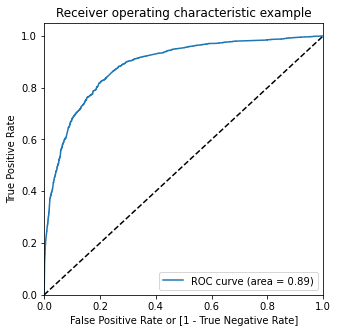

In [135]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conv_Prob)

# Finding Optimal Cutoff Point

In [136]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conv_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
Prospect ID,,,,,,,,,,,,,
f3af2d98-02db-45d7-bbf6-c641d6b4f4c3,0,0.293959,0,1,1,1,0,0,0,0,0,0,0
207aaf73-a121-41b8-96bb-b0d5c38e7a7b,0,0.232136,0,1,1,1,0,0,0,0,0,0,0
db308a34-ade6-4f0d-9779-586c5be188c7,0,0.431789,0,1,1,1,1,1,0,0,0,0,0
1199b37d-f610-4bb8-bf18-15267dec61fa,0,0.884274,1,1,1,1,1,1,1,1,1,1,0
6b2d3b2f-9990-449c-9333-012b578e39c8,0,0.170174,0,1,1,0,0,0,0,0,0,0,0


In [137]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.627087  0.968775  0.416542
0.2   0.2  0.766234  0.910381  0.677411
0.3   0.3  0.801175  0.837794  0.778611
0.4   0.4  0.811998  0.765207  0.840830
0.5   0.5  0.815863  0.697486  0.888806
0.6   0.6  0.802721  0.603001  0.925787
0.7   0.7  0.782313  0.513788  0.947776
0.8   0.8  0.760049  0.421736  0.968516
0.9   0.9  0.719079  0.285077  0.986507


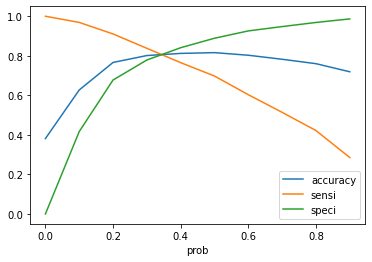

In [138]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

plt.show()

In [139]:
# Adding Optimil Prediction Column at cut of .34, that is if predicted probability is grater than .34 pridction =1
y_train_pred_final['Optimal'] = y_train_pred_final.Conv_Prob.map( lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

,Converted,Conv_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Optimal
Prospect ID,,,,,,,,,,,,,,
f3af2d98-02db-45d7-bbf6-c641d6b4f4c3,0,0.293959,0,1,1,1,0,0,0,0,0,0,0,0
207aaf73-a121-41b8-96bb-b0d5c38e7a7b,0,0.232136,0,1,1,1,0,0,0,0,0,0,0,0
db308a34-ade6-4f0d-9779-586c5be188c7,0,0.431789,0,1,1,1,1,1,0,0,0,0,0,1
1199b37d-f610-4bb8-bf18-15267dec61fa,0,0.884274,1,1,1,1,1,1,1,1,1,1,0,1
6b2d3b2f-9990-449c-9333-012b578e39c8,0,0.170174,0,1,1,0,0,0,0,0,0,0,0,0


In [140]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Optimal )
confusion2

array([[3240,  762],
       [ 482, 1984]], dtype=int64)

In [141]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final['Optimal'])

0.8076685219542362

In [142]:
# Let us calculate specificity
confusion2[0,0] / float(confusion2[0,0]+confusion2[0,1])

0.8095952023988006

In [143]:
# Sensitivity of  logistic regression model
confusion2[1,1] / float(confusion2[1,0]+confusion2[1,1])

0.8045417680454177

For optimal cut off the specifity, Accuracy and Sensitivity is approx. same as shown by graph 

In [144]:
# Positive predictive value(Precession) 
confusion2[1,1] / float(confusion2[0,1]+confusion2[1,1])


0.7225054624908959

In [145]:
# Recall
confusion2[1,1] / float(confusion2[1,0]+confusion2[1,1])

0.8045417680454177

### As Positive Predective value(Precession) is less than 80% for optimal cut off point, we have to set a diffrent cutoff point

### Precision and recall tradeoff

In [146]:
from sklearn.metrics import precision_recall_curve

In [147]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conv_Prob)

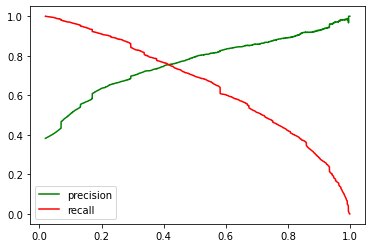

In [148]:
plt.plot(thresholds, p[:-1], "g-",label="precision")
plt.plot(thresholds, r[:-1], "r-",label="recall")
plt.legend()
plt.savefig("precession vs recall",dpi=300, bbox_inches="tight")
plt.show()

As can be sceen from the plot between precession and recall precession -s equal to recall at cutoff of around .42, but the precession appears to be below 80%

In [149]:
Precesion_Recall=pd.DataFrame({"Precession":p[0:4890],"recall":r[0:4890],"threshold":thresholds})
Precesion_Recall[Precesion_Recall.Precession==Precesion_Recall.recall]

,Precession,recall,threshold
2937,0.754663,0.754663,0.41709


In [150]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conv_Prob.map( lambda x: 1 if x > 0.42 else 0)
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3404,  598],
       [ 613, 1853]], dtype=int64)

### at the point where precession is equal to recall the cutoff is around .42, both precession and recall is  around 75% 

In [151]:
Precesion_Recall.loc[Precesion_Recall.Precession>.79].head()

,Precession,recall,threshold
3202,0.790168,0.703974,0.491193
3203,0.790073,0.703569,0.491264
3208,0.790050,0.701946,0.492846
3209,0.790411,0.701946,0.492863
3210,0.790315,0.701541,0.492934


In [152]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conv_Prob.map( lambda x: 1 if x > 0.49 else 0)
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3539,  463],
       [ 728, 1738]], dtype=int64)

In [153]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final['final_predicted'])

0.8158627087198516

In [154]:
# Let us calculate specificity
confusion2[0,0] / float(confusion2[0,0]+confusion2[0,1])

0.8843078460769616

In [155]:
# Sensitivity/Recall of  logistic regression model
confusion2[1,1] / float(confusion2[1,0]+confusion2[1,1])

0.7047850770478508

In [156]:
# Positive predictive value(Precision) 
confusion2[1,1] / float(confusion2[0,1]+confusion2[1,1])


0.789641072239891

### with cut off of .49, Precession is close to 80% but sensivity/recall has fallen to around 70, but as the objective of the case study is to have precession of around 80% cut-off of .49 should be chosen

In [157]:
# Adding lead score column
y_train_pred_final["Lead Score"]=round(y_train_pred_final["Conv_Prob"]*100,2)

In [158]:
y_train_pred_final.head()

,Converted,Conv_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Optimal,final_predicted,Lead Score
Prospect ID,,,,,,,,,,,,,,,,
f3af2d98-02db-45d7-bbf6-c641d6b4f4c3,0,0.293959,0,1,1,1,0,0,0,0,0,0,0,0,0,29.40
207aaf73-a121-41b8-96bb-b0d5c38e7a7b,0,0.232136,0,1,1,1,0,0,0,0,0,0,0,0,0,23.21
db308a34-ade6-4f0d-9779-586c5be188c7,0,0.431789,0,1,1,1,1,1,0,0,0,0,0,1,0,43.18
1199b37d-f610-4bb8-bf18-15267dec61fa,0,0.884274,1,1,1,1,1,1,1,1,1,1,0,1,1,88.43
6b2d3b2f-9990-449c-9333-012b578e39c8,0,0.170174,0,1,1,0,0,0,0,0,0,0,0,0,0,17.02


### Making predictions on the test set

In [159]:
# Add const
X_test_sm = sm.add_constant(X_test_1[col])

In [160]:
y_test_pred = res.predict(X_test_sm)
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred_final = pd.DataFrame({'Prospect ID':X_test["Prospect ID"],'Converted':y_test.values, 'Conv_Prob':y_test_pred})
y_test_pred_final.set_index('Prospect ID',inplace=True)
y_test_pred_final.head()

,Converted,Conv_Prob
Prospect ID,,
dd53b3eb-ae22-474c-b872-48b05bbe180b,1,0.610453
7a960b03-466c-4e36-bf12-b755fc77a0b1,1,0.933525
2bd5fd90-a8fe-413e-9b8a-28e8469c5a5c,1,0.777367
6eb89ae5-d1e0-4c19-8661-8f9545e0e408,0,0.170174
f7ed6c72-7d36-413c-b2e0-414213c4ceef,1,0.859352


In [161]:
y_test_pred_final["Lead Score"]=round(y_test_pred_final["Conv_Prob"]*100,2)
y_test_pred_final.head()

,Converted,Conv_Prob,Lead Score
Prospect ID,,,
dd53b3eb-ae22-474c-b872-48b05bbe180b,1,0.610453,61.05
7a960b03-466c-4e36-bf12-b755fc77a0b1,1,0.933525,93.35
2bd5fd90-a8fe-413e-9b8a-28e8469c5a5c,1,0.777367,77.74
6eb89ae5-d1e0-4c19-8661-8f9545e0e408,0,0.170174,17.02
f7ed6c72-7d36-413c-b2e0-414213c4ceef,1,0.859352,85.94


### Using Optimal cutoff point as obtained from ROC curve

In [162]:
y_test_pred_final['final_predicted'] = y_test_pred_final.Conv_Prob.map( lambda x: 1 if x > 0.34 else 0)
confusion2 = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.final_predicted )
confusion2

array([[1352,  325],
       [ 219,  876]], dtype=int64)

In [163]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final['final_predicted'])

0.8158627087198516

In [164]:
# Let us calculate specificity
confusion2[0,0] / float(confusion2[0,0]+confusion2[0,1])

0.8062015503875969

In [165]:
# Sensitivity of  logistic regression model
confusion2[1,1] / float(confusion2[1,0]+confusion2[1,1])

0.8

In [166]:
# Precession of Optimal model on test set
confusion2[1,1] / float(confusion2[0,1]+confusion2[1,1])

0.7293921731890092

### The performance of the model is similar on test and train set for optimal cutoff, 
## No overfitting

In [167]:
# Using cutoff of .49
y_test_pred_final['final_predicted'] = y_test_pred_final.Conv_Prob.map( lambda x: 1 if x > 0.49 else 0)
confusion2 = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.final_predicted )
confusion2

array([[1487,  190],
       [ 342,  753]], dtype=int64)

In [168]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final['final_predicted'])

0.8158627087198516

In [169]:
# Let us calculate specificity
confusion2[0,0] / float(confusion2[0,0]+confusion2[0,1])

0.8867024448419797

In [170]:
# Sensitivity of  logistic regression model
confusion2[1,1] / float(confusion2[1,0]+confusion2[1,1])

0.6876712328767123

Surprisingly the accuracy using "Optimal Cutoff" and ".49" as cutoff probability is exactly same

In [171]:
# Precession of Optimal model on test set
confusion2[1,1] / float(confusion2[0,1]+confusion2[1,1])

0.7985153764581124

##### the model is giving Precession of 80% on test set , Great

Conclusion: 
- The Optimal Model having cut off probability of ".34" as obtained from ROC curve gives 
        : Accuracy of 80.8%, Specificity of 80.9%, Sensivity of 80.4% on training set
          Accuracy of 81.6%, Specificity of 80.6%, Sensivity of 80.0% on test set 
          which are comparable, hence the model is not Overfitting on the Train set
          but Precision of 72.2%  on train set and 72.9% on test set which is way below the required 80%
          
- Using Model having cut off probability of ".42" precession is equal to recall 
        : Precession = Recall = 75% on train set,which is still below required 80%
          
- Using Model having cut off probability of ".49" gives 
        : Accuracy of 81.5%, Specificity of 88.4%, Sensivity of 70.4% on training set
          Accuracy of 81.6%, Specificity of 88.7%, Sensivity of 68.7% on test set 
          which are comparable, hence the model is not Overfitting on the Train set
          but Precession of 78.9%  on train set and 79.8% on test set which is near required 80%
          
- Although Optimal model gives sensivity of around 80% and model which is having cutoff at .49 gives senstivity of ariund 68%
  which means a lot of Converted cases are misclassified by the the model having .49 cutoff, but it serves over objective of   the required Precession to be around 80%.
  
- Hence the model with cutoff of .49 should be used to predict the "Leads".
- "Lead" with "lead Score" Grater than 50, should be considered "Hotlead"
 
          
                                                                
